In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/onlineretail/OnlineRetail.csv


In [3]:
import pandas as pd
import seaborn as sns
!pip install plotly-express
import plotly.express as px
#https://plotly.com/python/plotly-express/#gallery
#https://towardsdatascience.com/interactive-distribution-plots-with-plotly-ea58efc78885
import matplotlib.pyplot as plt
!pip install holiday
import holiday
from scipy import stats
import plotly.graph_objects as go

In [4]:
df = pd.read_csv('/kaggle/input/onlineretail/OnlineRetail.csv',encoding= 'unicode_escape')
#df = pd.read_csv(parse_dates=['created_at'])
#from datetime import datetime

#datetime.strptime(date_string, "%Y-%m-%d")
#..this raises a ValueError if it receives an incompatible format.



In [5]:
df.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

      InvoiceDate  UnitPrice  CustomerID         Country  
0  12/1/2010 8:26       2.55     17850.0  United Kingdom  
1  12/1/2010 8:26       3.39     17850.0  United Kingdom  
2  12/1/2010 8:26       2.75     17850.0  United Kingdom  
3  12/1/2010 8:26       3.39     17850.0  United Kingdom  
4  12/1/2010 8:26       3.39     17850.0  United Kingdom

In [6]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [8]:
df.describe().T

count          mean          std       min       25%       50%  \
Quantity    541909.0      9.552250   218.081158 -80995.00      1.00      3.00   
UnitPrice   541909.0      4.611114    96.759853 -11062.06      1.25      2.08   
CustomerID  406829.0  15287.690570  1713.600303  12346.00  13953.00  15152.00   

                 75%      max  
Quantity       10.00  80995.0  
UnitPrice       4.13  38970.0  
CustomerID  16791.00  18287.0

In [9]:
import plotly.figure_factory as ff
from plotly.offline import init_notebook_mode, iplot
table_cat = ff.create_table(df.describe(include=['O']).T, index=True, index_title='Categorical columns')
iplot(table_cat)

# Date time format cheatsheet 
https://strftime.org/
# pandas date time api
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html

In [10]:
#today = pd.to_datetime('today')
#df['age'] = today.year - df['DoB'].dt.year
#df

# Encoding Date Field as a datetime object

In [11]:
#https://towardsdatascience.com/working-with-datetime-in-pandas-dataframe-663f7af6c587
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'],infer_datetime_format = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [12]:
df.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom

In [13]:
df['TotalPrice'] = df.apply(lambda row: row['UnitPrice'] * row['Quantity'], axis = 1)
df.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom       15.30  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom       20.34  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom       22.00  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom       20.34  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom       20.34

# computing new features based on date - year, month, day, day name, month name, weekday(number)

In [14]:
df["Year"] = (df["InvoiceDate"]).dt.year
df["Month"] = (df["InvoiceDate"]).dt.month
df["Day"] = (df["InvoiceDate"]).dt.day
df["Time"] = df["InvoiceDate"].dt.strftime('%H:%M')
df['day_name'] = df['InvoiceDate'].dt.day_name()
df['weekday'] = df['InvoiceDate'].dt.weekday
df['month_name'] = df['InvoiceDate'].dt.month_name()
df['just_date'] = df['InvoiceDate'].dt.date

In [15]:
#get the first entry for the month
df.groupby('Month').first()
#Invoice count by month
df.groupby('Month')['InvoiceNo'].count()
#Sales by month
df.groupby('Month')['TotalPrice'].sum()

Month
1      560000.260
2      498062.650
3      683267.080
4      493207.121
5      723333.510
6      691123.120
7      681300.111
8      682680.510
9     1019687.622
10    1070704.670
11    1461756.250
12    1182625.030
Name: TotalPrice, dtype: float64

Time based aggregations
Aggregating data based on hour, day, week, month, etc
#Time Offset Aliases : https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#timeseries-offset-aliases


In [16]:
# Sales in each hour 
df_hourly = df.resample('H', on='InvoiceDate').TotalPrice.sum().to_frame().reset_index()
#myseries.to_frame(name='my_column_name')
print(df_hourly.head())
print(df_hourly.info())
# Changing start time for each hour, by default start time is at 0th minute
df.resample('H', on='InvoiceDate', offset='15Min10s').TotalPrice.sum().head(5)
#Sales by week
df.resample('W', on='InvoiceDate').TotalPrice.sum().head(5)
# By default, week starts with Sunday. Let's change it to start with Monday
df.resample('W-MON', on='InvoiceDate').TotalPrice.sum().head(5)
#Average sales by month 
df.resample('M', on='InvoiceDate').TotalPrice.mean()
#Count of customers who made an order each month
df.resample('M', on='InvoiceDate').CustomerID.count()
# by default month labels are assigned to the last day of month, lets change it 
# to start from Month starting using 'MS' frequency
df.resample('MS', on='InvoiceDate').TotalPrice.sum()

          InvoiceDate  TotalPrice
0 2010-12-01 08:00:00     1383.81
1 2010-12-01 09:00:00     7324.24
2 2010-12-01 10:00:00     5094.33
3 2010-12-01 11:00:00     4234.16
4 2010-12-01 12:00:00     7422.42
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8957 entries, 0 to 8956
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   InvoiceDate  8957 non-null   datetime64[ns]
 1   TotalPrice   8957 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 140.1 KB
None


InvoiceDate
2010-12-01     748957.020
2011-01-01     560000.260
2011-02-01     498062.650
2011-03-01     683267.080
2011-04-01     493207.121
2011-05-01     723333.510
2011-06-01     691123.120
2011-07-01     681300.111
2011-08-01     682680.510
2011-09-01    1019687.622
2011-10-01    1070704.670
2011-11-01    1461756.250
2011-12-01     433668.010
Freq: MS, Name: TotalPrice, dtype: float64

# Groupby function Examples

In [17]:
#Count customers by country
df.groupby('Country')['CustomerID'].count()
# What is the sales, for customers in Canada only, to each network
df[df['Country'] == 'Canada'].groupby('CustomerID')['TotalPrice'].sum()

CustomerID
15388.0     140.54
17443.0     534.24
17444.0    2940.04
17844.0      51.56
Name: TotalPrice, dtype: float64

# group by multiple columns

In [18]:
df.groupby(['StockCode', 'Description'])['InvoiceNo'].count()
#To make it into a dataframe
df.groupby(["StockCode", "Description"], as_index=False)["InvoiceNo"].count()

StockCode                          Description  InvoiceNo
0            10002          INFLATABLE POLITICAL GLOBE          71
1            10080             GROOVY CACTUS INFLATABLE         22
2            10080                                check          1
3            10120                         DOGGY RUBBER         30
4           10123C                HEARTS WRAPPING TAPE           3
...            ...                                  ...        ...
4787  gift_0001_20  to push order througha s stock was           1
4788  gift_0001_30   Dotcomgiftshop Gift Voucher £30.00          7
4789  gift_0001_40   Dotcomgiftshop Gift Voucher £40.00          3
4790  gift_0001_50   Dotcomgiftshop Gift Voucher £50.00          4
4791             m                               Manual          1

[4792 rows x 3 columns]

# Group by and get multiple statistics for different columns
Calculating receny, frequency, and the customer lifetime value

In [19]:
#Getting recency frequency and customer lifetime value
RFCLTV = df.groupby(
   ['Country', 'CustomerID'], as_index=False
).agg(
    {
         'InvoiceNo':'count',    # count number of orders for each customer in each country
         'TotalPrice': "sum",  # get the count of networks
         'InvoiceDate': 'last'  # get the last date per group
    }
)
RFCLTV.head()

Country  CustomerID  InvoiceNo  TotalPrice         InvoiceDate
0  Australia     12386.0         10      401.90 2011-01-06 12:37:00
1  Australia     12388.0        100     2780.66 2011-11-24 12:30:00
2  Australia     12393.0         64     1582.60 2011-09-28 15:41:00
3  Australia     12415.0        778   123725.45 2011-11-15 14:22:00
4  Australia     12422.0         21      386.20 2011-09-05 09:48:00

# Combining date based aggregations and group by multiple column aggregations

naming grouped aggregate columns with multiple statistics, reset index to include the date column

In [20]:
agg_data = df.groupby([pd.Grouper(key='InvoiceDate', freq='MS'), 'Country'])\
    .agg(unique_items=('StockCode', 'nunique'),
         total_quantity=('Quantity','sum'),
         total_amount=('TotalPrice','sum')).reset_index()
agg_data_uk = agg_data[agg_data['Country']=='United Kingdom']

In [21]:
agg_data_uk.head()

InvoiceDate         Country  unique_items  total_quantity  total_amount
23   2010-12-01  United Kingdom          2802          298101    676742.620
47   2011-01-01  United Kingdom          2622          237381    434308.300
71   2011-02-01  United Kingdom          2409          225641    408247.910
95   2011-03-01  United Kingdom          2553          279843    559707.390
122  2011-04-01  United Kingdom          2548          257666    442254.041

# Line chart

<AxesSubplot:xlabel='InvoiceDate', ylabel='total_amount'>

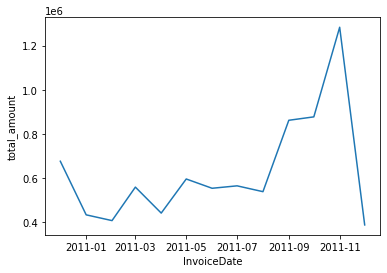

In [22]:
sns.lineplot(data=agg_data_uk, x="InvoiceDate", y="total_amount")

In [23]:
agg_data_non_uk = agg_data[agg_data['Country']!='United Kingdom']
fig = px.line(agg_data_non_uk, x="InvoiceDate", y="total_amount", color="Country",title="Sales by Country in 2011", hover_name="total_amount",
        line_shape="spline", render_mode="svg")
fig.show()

Line chart basic 

In [64]:
import plotly.graph_objects as go

# Create random data with numpy
import numpy as np
np.random.seed(1)

N = 100
random_x = np.linspace(0, 1, N)
random_y0 = np.random.randn(N) + 5
random_y1 = np.random.randn(N)
random_y2 = np.random.randn(N) - 5

# Create traces
fig = go.Figure()
fig.add_trace(go.Scatter(x=agg_data_uk['InvoiceDate'], y=agg_data_non_uk['total_amount'],
                    mode='lines',
                    name='lines'))
fig.add_trace(go.Scatter(x=agg_data_uk['InvoiceDate'], y=agg_data_non_uk['total_quantity'],
                    mode='lines+markers',
                    name='lines+markers'))
#fig.add_trace(go.Scatter(x=random_x, y=random_y2,
#                    mode='markers', name='markers'))

fig.show()

Histograms on date data

In [25]:
fig = px.histogram(df, x="just_date" , nbins = 30)
fig.update_layout(bargap=0.2)
fig.show()

# Bubble Chart


In [8]:

df = px.data.gapminder()

fig = px.scatter(df.query("year==2007"), x="gdpPercap", y="lifeExp",size="pop", color="continent",
                 hover_name="country", log_x=True, size_max=60)
fig.show()


# Box Plots

In [25]:
fig = px.box(agg_data_non_uk, x="Country", y="total_amount")
fig.show()

In [29]:
fig = px.violin(agg_data_non_uk, x="Country", y="total_amount", box = True)
fig.show()

Univariate Analysis - 

In [30]:
df.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  \
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom       15.30   
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom       20.34   
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom       22.00   
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom       20.34   
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom       20.34   

   Year  Month  Day   Time   day_name  weekday month_name   just_date  
0  2010     12    1  08:26  Wednesday        2   December  2010-12-01  
1  2010     12    1  08:26  Wednesday        2   December  2010-12-01  
2  2010     12    1  08:26  Wednesday        2   December  2010-12-01  
3  2010     12    1  08:26  Wednesday        2   December  2010-12-01  
4  2010     12    1  08:26  Wednesday        2   December  2010-12-01

# Bar Plot

In [31]:
Country_total_sales = df.groupby(['Country'], as_index = False)['TotalPrice'].sum()
Country_total_sales = Country_total_sales.sort_values('TotalPrice', ascending=False)
px.bar(Country_total_sales, x = 'Country', y = 'TotalPrice', title = 'Sales by Country', template = 'seaborn')

In [32]:
Country_total_sales.head()

Country   TotalPrice
36  United Kingdom  8187806.364
24     Netherlands   284661.540
10            EIRE   263276.820
14         Germany   221698.210
13          France   197403.900

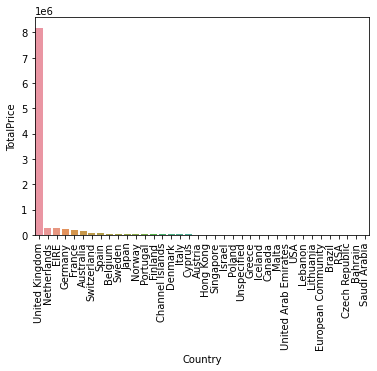

In [33]:
plt = sns.barplot(data = Country_total_sales, x = 'Country', y = 'TotalPrice')
plt.tick_params(axis='x', rotation=90)

Stacked bar chart

In [ ]:
#df.head()

In [ ]:
#nations = ['United Kingdom', 'Netherlands', 'EIRE', 'Germany', 'France', 'Australia']
#filter_df = df[df["Country"].isin(nations)]
#fig = px.bar(filter_df, x="month_name", y='TotalPrice', color = 'Country', title="Stacked Bar chart")
#fig.show()

# Bivariate analysis

In [34]:
fig = px.scatter(RFCLTV, x="InvoiceNo", y="TotalPrice", title = 'Frequency vs Customer Lifetime Value')
fig.show()

In [36]:
RFCLTV_removed_outlier = RFCLTV[RFCLTV['InvoiceNo']<3000]
fig = px.scatter(RFCLTV_removed_outlier, x="InvoiceNo", y="TotalPrice", title = 'Frequency vs Customer Lifetime Value')
fig.show()

In [59]:
fig = px.scatter(RFCLTV_removed_outlier, x="InvoiceNo", y="TotalPrice", color="Country", marginal_y="violin",
           marginal_x="box", trendline="ols", template="simple_white")
fig.show()

# Scatter Matrix - Bivariate analysis

In [37]:
fig = px.scatter_matrix(agg_data_non_uk, dimensions=["total_amount", "unique_items", "total_quantity"], color="Country", title = 'Bivariate analysis - Scatter matrix between all numeric variables')
fig.update_traces(diagonal_visible=False)
fig.show()

# Correlation

In [38]:
corr = agg_data_non_uk.corr(method = 'pearson')

In [40]:
fig = go.Figure(data= go.Heatmap(z=corr,
                                 x=corr.index.values,
                                 y=corr.columns.values,
                                 #colorscale='earth',                                  
                                 )
                )
fig.show()

#https://www.kaggle.com/desalegngeb/plotly-guide-customize-for-better-visualizations

In [41]:
df = df.rename(columns = {'Description':'ItemDescription'})

In [42]:
df.describe().T

count          mean          std        min       25%  \
Quantity    541909.0      9.552250   218.081158  -80995.00      1.00   
UnitPrice   541909.0      4.611114    96.759853  -11062.06      1.25   
CustomerID  406829.0  15287.690570  1713.600303   12346.00  13953.00   
TotalPrice  541909.0     17.987795   378.810824 -168469.60      3.40   
Year        541909.0   2010.921609     0.268787    2010.00   2011.00   
Month       541909.0      7.553128     3.509055       1.00      5.00   
Day         541909.0     15.023096     8.664063       1.00      7.00   
weekday     541909.0      2.431277     1.844709       0.00      1.00   

                 50%       75%       max  
Quantity        3.00     10.00   80995.0  
UnitPrice       2.08      4.13   38970.0  
CustomerID  15152.00  16791.00   18287.0  
TotalPrice      9.75     17.40  168469.6  
Year         2011.00   2011.00    2011.0  
Month           8.00     11.00      12.0  
Day            15.00     22.00      31.0  
weekday         2.00      4.00       6.0

In [43]:
df.columns

Index(['InvoiceNo', 'StockCode', 'ItemDescription', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'TotalPrice', 'Year', 'Month',
       'Day', 'Time', 'day_name', 'weekday', 'month_name', 'just_date'],
      dtype='object')

# Checking unique values in a column

In [44]:
df['Country'].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Bahrain', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'RSA'], dtype=object)

checking number of unique categories

In [45]:
df['Country'].nunique()

38

# Dropping Columns in Pandas

In [46]:
df['Country2'] = df['Country']
print(df.columns)

Index(['InvoiceNo', 'StockCode', 'ItemDescription', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'TotalPrice', 'Year', 'Month',
       'Day', 'Time', 'day_name', 'weekday', 'month_name', 'just_date',
       'Country2'],
      dtype='object')


In [47]:
df.drop(['Country2'], axis = 1, inplace = True)
print(df.columns)

Index(['InvoiceNo', 'StockCode', 'ItemDescription', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'TotalPrice', 'Year', 'Month',
       'Day', 'Time', 'day_name', 'weekday', 'month_name', 'just_date'],
      dtype='object')


# Make Frequency count of categorical variable and add it to a new dataframe

In [48]:
country_orders_dict= df['Country'].value_counts().to_dict()
country_orders_df= df['Country'].value_counts().to_frame(name = 'counts').reset_index()
country_orders_df = df.rename(columns = {'index':'Country'})
#df = df['Country'].value_counts().rename_axis('Country').reset_index(name='counts')
#value_counts can take sort = 
country_item_desc_orders_df = df.groupby(['Country','ItemDescription']).size().reset_index(name = 'counts')
print(country_orders_dict)
print(country_orders_df.head())
print(country_item_desc_orders_df.head())

{'United Kingdom': 495478, 'Germany': 9495, 'France': 8557, 'EIRE': 8196, 'Spain': 2533, 'Netherlands': 2371, 'Belgium': 2069, 'Switzerland': 2002, 'Portugal': 1519, 'Australia': 1259, 'Norway': 1086, 'Italy': 803, 'Channel Islands': 758, 'Finland': 695, 'Cyprus': 622, 'Sweden': 462, 'Unspecified': 446, 'Austria': 401, 'Denmark': 389, 'Japan': 358, 'Poland': 341, 'Israel': 297, 'USA': 291, 'Hong Kong': 288, 'Singapore': 229, 'Iceland': 182, 'Canada': 151, 'Greece': 146, 'Malta': 127, 'United Arab Emirates': 68, 'European Community': 61, 'RSA': 58, 'Lebanon': 45, 'Lithuania': 35, 'Brazil': 32, 'Czech Republic': 30, 'Bahrain': 19, 'Saudi Arabia': 10}
  InvoiceNo StockCode                      ItemDescription  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOT

# Plot Frequency Values 

TypeError: 'Text' object is not callable

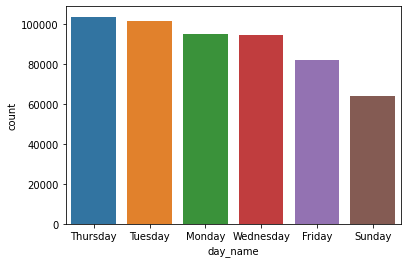

In [49]:
plt = sns.countplot(data = df,x = 'day_name', order = df['day_name'].value_counts().index)
plt.title('Shopping count by Day')
plt.ylabel('Order Count')
plt.xlabel('Day of the Week')
plt.xticks(rotation = 90)
plt.show()

# Remove outliers using z score

In [50]:
no_outliers_df = df[(np.abs(stats.zscore(df['TotalPrice'])) < 3)]

# Plot box and whiskers plot to look for outliers in numeric continuous data

In [51]:
#fig = px.box(no_outliers_df, y="TotalPrice", points="all")
#fig.show()

# Plot Univariate histogram distribution of continuous numeric variable

In [52]:
#df['UnitPrice'].plot.hist(bins = 4)

# Duplicated Data check

In [53]:
df[df.duplicated(keep = False)].sort_values(['InvoiceNo','StockCode'])

InvoiceNo StockCode                      ItemDescription  Quantity  \
494       536409     21866          UNION JACK FLAG LUGGAGE TAG         1   
517       536409     21866          UNION JACK FLAG LUGGAGE TAG         1   
485       536409     22111         SCOTTIE DOG HOT WATER BOTTLE         1   
539       536409     22111         SCOTTIE DOG HOT WATER BOTTLE         1   
489       536409     22866        HAND WARMER SCOTTY DOG DESIGN         1   
...          ...       ...                                  ...       ...   
440149   C574510     22360      GLASS JAR ENGLISH CONFECTIONERY        -1   
461407   C575940     23309  SET OF 60 I LOVE LONDON CAKE CASES        -24   
461408   C575940     23309  SET OF 60 I LOVE LONDON CAKE CASES        -24   
529980   C580764     22667                RECIPE BOX RETROSPOT        -12   
529981   C580764     22667                RECIPE BOX RETROSPOT        -12   

               InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  \
494    2010-12-01 11:45:00       1.25     17908.0  United Kingdom        1.25   
517    2010-12-01 11:45:00       1.25     17908.0  United Kingdom        1.25   
485    2010-12-01 11:45:00       4.95     17908.0  United Kingdom        4.95   
539    2010-12-01 11:45:00       4.95     17908.0  United Kingdom        4.95   
489    2010-12-01 11:45:00       2.10     17908.0  United Kingdom        2.10   
...                    ...        ...         ...             ...         ...   
440149 2011-11-04 13:25:00       2.95     15110.0  United Kingdom       -2.95   
461407 2011-11-13 11:38:00       0.55     17838.0  United Kingdom      -13.20   
461408 2011-11-13 11:38:00       0.55     17838.0  United Kingdom      -13.20   
529980 2011-12-06 10:38:00       2.95     14562.0  United Kingdom      -35.40   
529981 2011-12-06 10:38:00       2.95     14562.0  United Kingdom      -35.40   

        Year  Month  Day   Time   day_name  weekday month_name   just_date  
494     2010     12    1  11:45  Wednesday        2   December  2010-12-01  
517     2010     12    1  11:45  Wednesday        2   December  2010-12-01  
485     2010     12    1  11:45  Wednesday        2   December  2010-12-01  
539     2010     12    1  11:45  Wednesday        2   December  2010-12-01  
489     2010     12    1  11:45  Wednesday        2   December  2010-12-01  
...      ...    ...  ...    ...        ...      ...        ...         ...  
440149  2011     11    4  13:25     Friday        4   November  2011-11-04  
461407  2011     11   13  11:38     Sunday        6   November  2011-11-13  
461408  2011     11   13  11:38     Sunday        6   November  2011-11-13  
529980  2011     12    6  10:38    Tuesday        1   December  2011-12-06  
529981  2011     12    6  10:38    Tuesday        1   December  2011-12-06  

[10147 rows x 17 columns]

In [54]:
duplicates = df[df.duplicated(keep = False)].sort_values(['InvoiceNo','StockCode'])

In [55]:
df.shape

(541909, 17)

# Drop Duplicates

In [ ]:
df.drop_duplicates(keep = 'first', inplace = True)
df.shape

# Missing Data Analysis

In [56]:
missing_total = df.isnull().sum().sort_values(ascending = False)
missing_pct = (df.isnull().sum()/df.isnull().count()).sort_values(ascending = False)
missing_value_df = pd.concat([missing_total,missing_pct],axis = 1, keys = ['missing_total','missing_pct'])
missing_value_df

missing_total  missing_pct
CustomerID              135080     0.249267
ItemDescription           1454     0.002683
InvoiceNo                    0     0.000000
Month                        0     0.000000
month_name                   0     0.000000
weekday                      0     0.000000
day_name                     0     0.000000
Time                         0     0.000000
Day                          0     0.000000
TotalPrice                   0     0.000000
Year                         0     0.000000
StockCode                    0     0.000000
Country                      0     0.000000
UnitPrice                    0     0.000000
InvoiceDate                  0     0.000000
Quantity                     0     0.000000
just_date                    0     0.000000

# Fill missing values with FillNA

In [57]:
df['ItemDescription'] = df['ItemDescription'].fillna('No Description')

In [ ]:
#df.fillna(0)
#df.fillna(method="ffill")
#df.fillna(method="bfill")
#df.fillna(df.mean())
#df['Item_Weight'] = df['Item_Weight'].fillna((df['Item_Weight'].mean()))
#df = df.fillna(df.median()) 
#fill_mode = lambda col: col.fillna(col.mode())
#df.apply(fill_mode, axis=0)

# Drop NA

In [ ]:
#Drop the rows where at least one element is missing.
df.dropna()
#Drop the columns where at least one element is missing.
df.dropna(axis='columns')
#Drop the rows where all elements are missing.
df.dropna(how = 'all')
#Keep only the rows with at least 2 non-NA values.
df.dropna(thresh=2)
#Define in which columns to look for missing values.
df.dropna(subset=['name', 'toy'])

In [ ]:
# Pandas merge doc
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html